# T

# NETFLIX Content Analysis

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip install yfinance # for gathering stock related data from yahoo finance
import datetime # for converting into date time format
!pip install pandas plotly
import pandas as pd
from plotly.offline import iplot
import plotly.graph_objs as go # for the  map grpah that shows countries distribution
import plotly as px



ERROR: Invalid requirement: '#'


# NETFLIX DATASET

# Loading the data set 

In [11]:
data=pd.read_csv("netflix_titles_new.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


# Checking for Duplicates
- gives dimnensions: 8808 rows and 12 columns

In [12]:
data.shape
data.describe()

,release_year
count,8808.000000
mean,2014.180972
std,8.819111
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [13]:
data[data.duplicated()] # chceking for duplicate
                        # only 1 row as  a duplicate found

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8807,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


# Removing Duplicates
removing that duplicate using .drop_duplicates()
inplace as true measn that this removal of duplicates is being done on this  original dataset  

In [14]:
data.drop_duplicates(inplace =True)

# Is there any Null values 

In [15]:
data.isnull() # true means yes  there are null values

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
data.isnull().sum() # show count of null values of all columns in dataset

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Creating Heat Map To show Null values:
- the white lines represent ther null values in each column. The director column has the biggest null values

<Axes: >

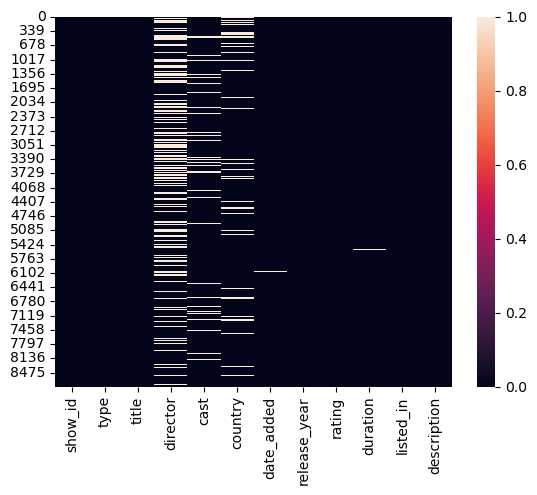

In [17]:
sns.heatmap(data.isnull()) 

# Analysis:

 # Year having the highest No of movies and tv shows  realeased:
 to do this we must  have date  in time format but in our dataset it is in object format means string values. So convert it  in time format we import datetime library and crreate a new column in our dataset that contains the converted date

In [18]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [19]:
data['Date_n'] = pd.to_datetime(data['date_added'], errors='coerce') #
data
# coerce is used to avoid error. for example during conversion from string to numeric, if any value is non convertible instead 
# throwing error that will be convcerted to NAN value.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_n
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019-07-01
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11


In [20]:
data.dtypes     # now date_n has       

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added              object
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
Date_n          datetime64[ns]
dtype: object

In [21]:
data["Date_n"].dt.year.value_counts() #counts the occurance of indivdual years in date column, it means in 2019 it found 1999
                                     #records which is is  far the highest number of records 

Date_n
2019.0    1999
2020.0    1878
2018.0    1625
2021.0    1498
2017.0    1164
2016.0     418
2015.0      73
2014.0      23
2011.0      13
2013.0      10
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: count, dtype: int64

# 

# In 2019 most of the content was released beacaue its bar height is the maximum among all

<Axes: xlabel='Date_n'>

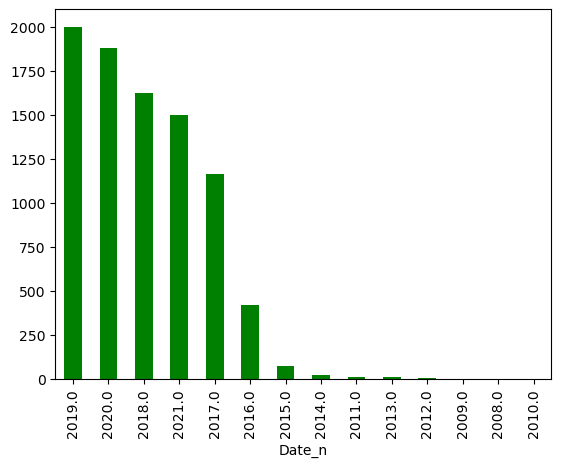

In [22]:
data["Date_n"].dt.year.value_counts().plot(kind="bar",color='green')

# Total movies in data set:
- groupby groups  the DataFrame data by the unique values in the column named "type". After this operation, wew will have separate groups of rows where each group corresponds to a unique value in the "type" column.
- then we apply count to the type column in each of these groups and counting the occurances of unique vcalues

In [23]:
data.groupby("type").type.count() # since there are only two items in our data set 

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

# Distribution Of Movies & TV shows: 

# By the graph below we can see that NETFLIX has more movies than Tv shows.

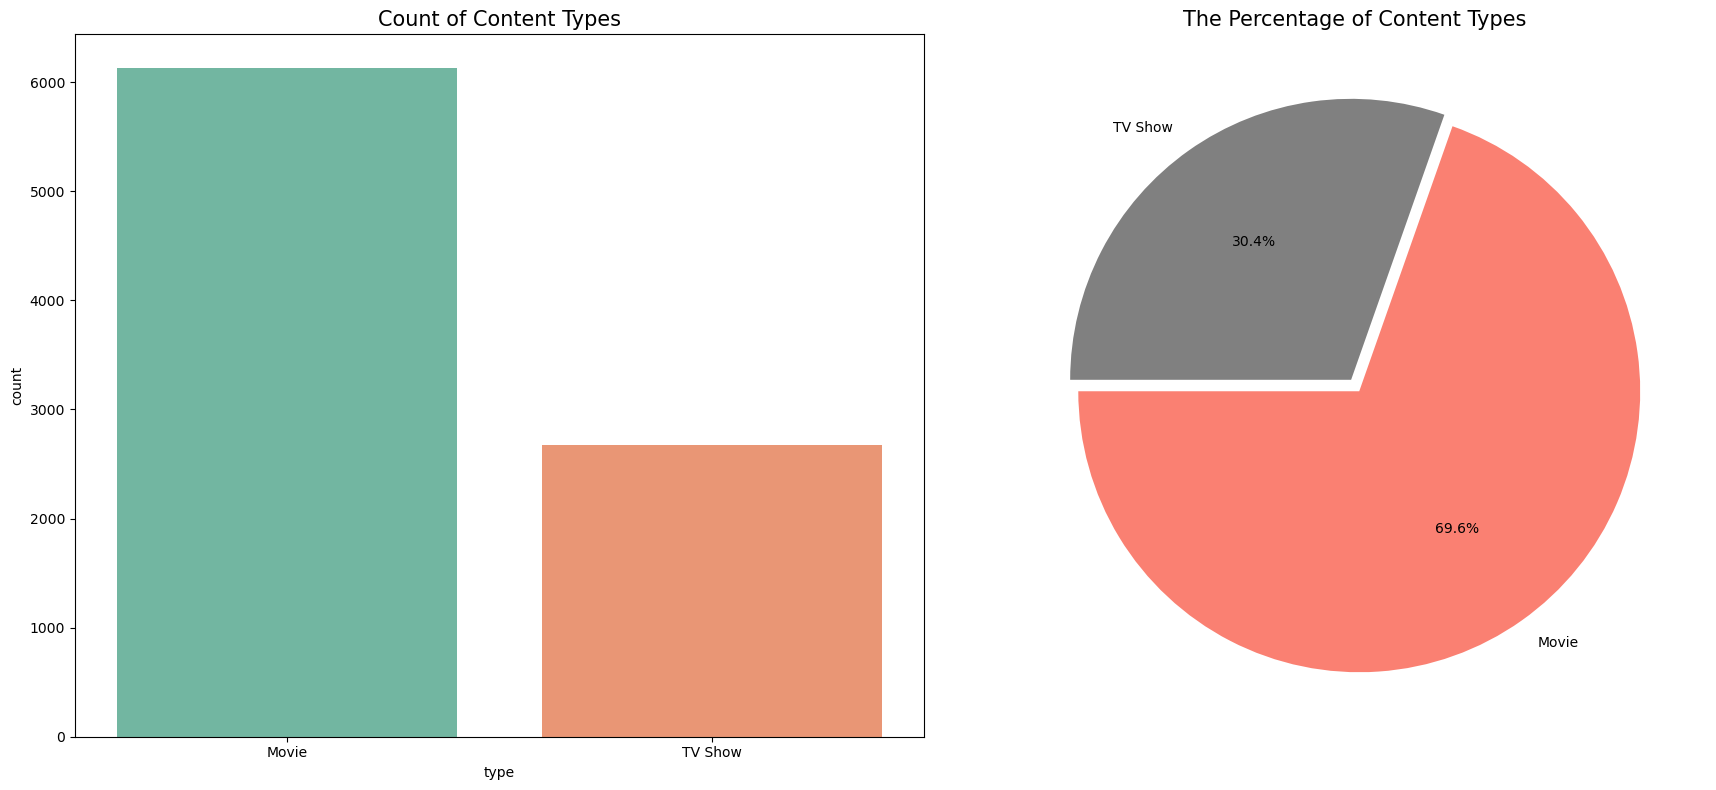

In [24]:
col = "type" #specifying col as type in our dataset

fig, axes = plt.subplots(1, 2, figsize=(18, 8)) # making 2 subplots

sns.countplot(ax=axes[0], x=col, data=data, palette='Set2') # first plot as count
axes[0].set_title("Count of Content Types", fontsize=15)

data_counts = data[col].value_counts() #pie plot
axes[1].pie(data_counts, explode=(0.025, 0.025), labels=data_counts.index, colors=['salmon', 'grey'], autopct='%1.1f%%', startangle=180)
axes[1].set_title("The Percentage of Content Types", fontsize=15) #title

plt.tight_layout()
plt.show()


# Total Movies & TV shows released by India:

# From the below analysis its clear that  India has released more movies than Tv shows

In [25]:
movies = data[(data['type'] == 'Movie') & (data['country'] == 'India')]
print(" Total Movies Released By the India: ",len(movies))
print(" ")
print(movies)

tv=data[(data["type"]== "TV Show") & (data ["country"]== "India")]
print(" ")
print(" ")
print(" Total TV Shows Released By the India: ", len(tv))
print(" ")
print(" ")
print( " " )
print( tv)

 Total Movies Released By the India:  893
 
     show_id   type                  title                 director  \
24       s25  Movie                  Jeans               S. Shankar   
105     s106  Movie       Angamaly Diaries     Lijo Jose Pellissery   
114     s115  Movie                 Anjaam             Rahul Rawail   
116     s117  Movie                 Dhanak          Nagesh Kukunoor   
118     s119  Movie                Gurgaon            Shanker Raman   
...      ...    ...                    ...                      ...   
8772   s8773  Movie  Yamla Pagla Deewana 2           Sangeeth Sivan   
8773   s8774  Movie    Yanda Kartavya Aahe             Kedar Shinde   
8798   s8799  Movie               Zed Plus  Chandra Prakash Dwivedi   
8799   s8800  Movie                  Zenda           Avadhoot Gupte   
8806   s8807  Movie                 Zubaan              Mozez Singh   

                                                   cast country  \
24    Prashanth, Aishwarya Rai Bachc

# No of Movies & Tv shows released by India Each Year:

# From the graph it shows that in the year 2018, alot of movies were released. TV shows were most released in year 2018  & 2020

 Number of movies released in year:  Date_n
2018    316
2019    187
2020    172
2017    128
2021     80
2016     10
Name: count, dtype: int64
 
 Number of TV shows released in years:  Date_n
2020.0    17
2018.0    17
2019.0    16
2021.0    15
2017.0    13
Name: count, dtype: int64


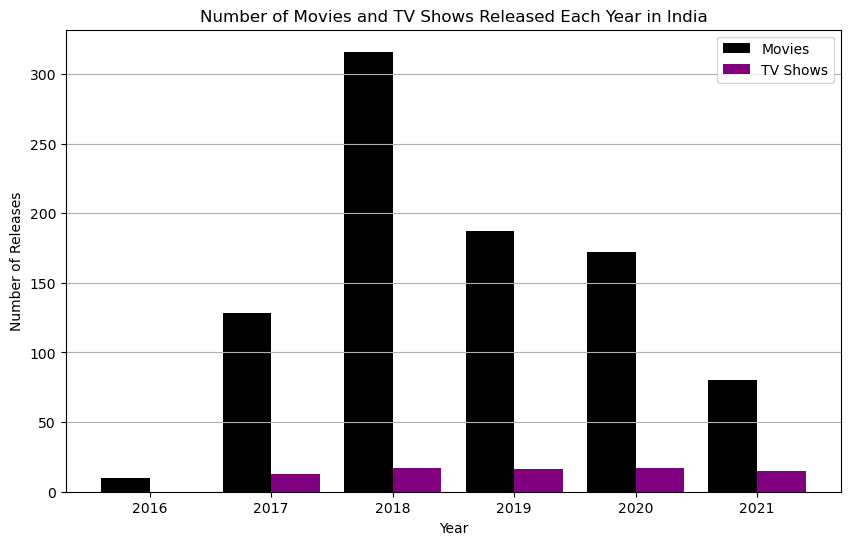

In [26]:
movies_year=movies["Date_n"].dt.year.value_counts() 
tv_year=tv["Date_n"].dt.year.value_counts()
print(" Number of movies released in year: ", movies_year)
print(" ")
print(" Number of TV shows released in years: " ,tv_year)



fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(movies_year.index - 0.2, movies_year, width=0.4, label='Movies', color='black') # taking index from movie years, and subtracting  0.2 to shift its position towrds left
ax.bar(tv_year.index + 0.2, tv_year, width=0.4, label='TV Shows', color='purple')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Releases')
ax.set_title('Number of Movies and TV Shows Released Each Year in India')
ax.legend()

plt.grid(True, 'major', 'y')

plt.show()

# Distribution From Each Country 
- reset.index again starts the row from the very start of dataset. 

In [86]:
data_countries = pd.DataFrame(data.country.value_counts().reset_index().values, columns=["country", "count"])
print(data_countries.head())
countries = data.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);countries = countries[countries != 'production country unavailable']
iplot([go.Choropleth(locationmode='country names', locations=countries,z=countries.value_counts()
)])

          country count
0   United States  2818
1           India   972
2  United Kingdom   419
3           Japan   245
4     South Korea   199


# Ratings For Movies & TV Shows:
- G (General Audience)
- PG (Parental Guidance Suggested)
- PG-13 (Parents Strongly Cautioned)
- R (Restricted)
- TV-MA (Mature Audience)
- TV-Y (All Children)
- NC-17 content is restricted to viewers 17 years old and above.
- PG-13 content may be inappropriate for children under 13 years old.
- TV-14: Intended for viewers aged 14

# The count of TV-MA is the greatest for movies and TV shows therefore  it means that most of the movies and tv shows are for certain audience .

# Th bar for General Audience is the smallest which means that very less movies are for general audience while its bar for tv shows doesnt exist meaning that no tv shows are for general audience

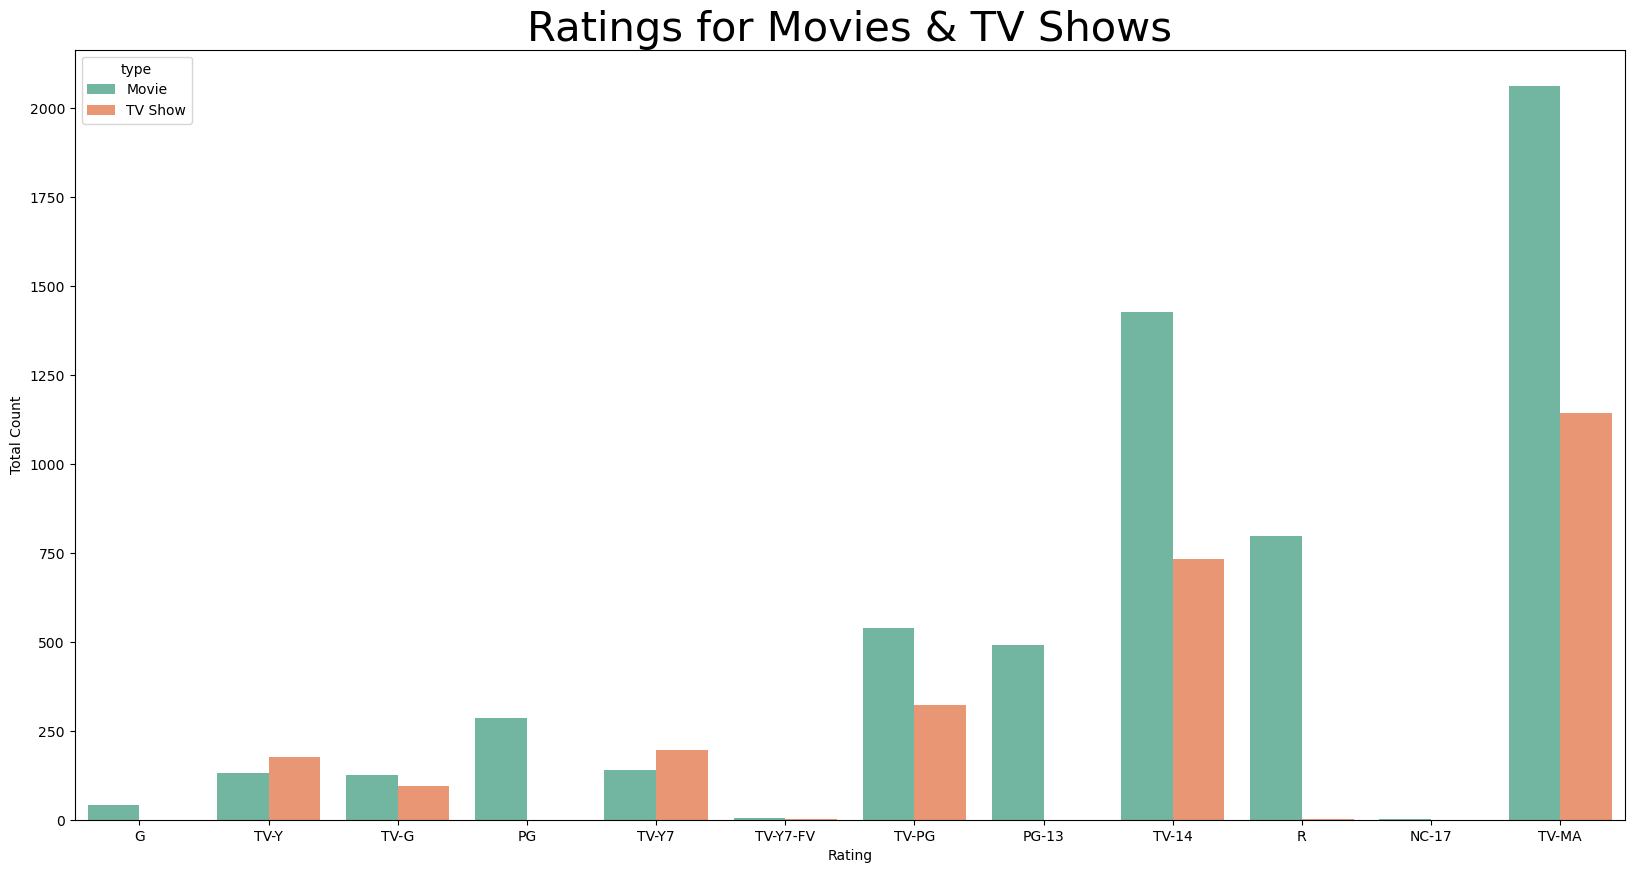

In [19]:
#x made list of all orders
order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA'] 

plt.figure(figsize=(20, 10)) #defined the figure type
g = sns.countplot(data=data, x='rating', hue='type', order=order, palette="Set2") # rating is defined on x while colors of bars
                                                                                    # would be assigned based on type column
plt.title("Ratings for Movies & TV Shows", fontsize=30)
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()


# Comparison Of Rating Between Different Countries: 
- From Graph its evident that:
# US has tv shows and movies for more mature audience .
# Indonesia has very less number of Tv shows and movies released while released one lies in the category of 14+ age.
# France has the maximum number of  movies and Tv shows that has TV-Ma ranking.

- first we extracted the desired columns from our dataset
- then we made a list of all the orders that was in out datset
- 1,3: defines that we have 3 columns in which we can make our graphs
- then through countplot we get our graphs that tell the count of movies and tv shows in each ranking.

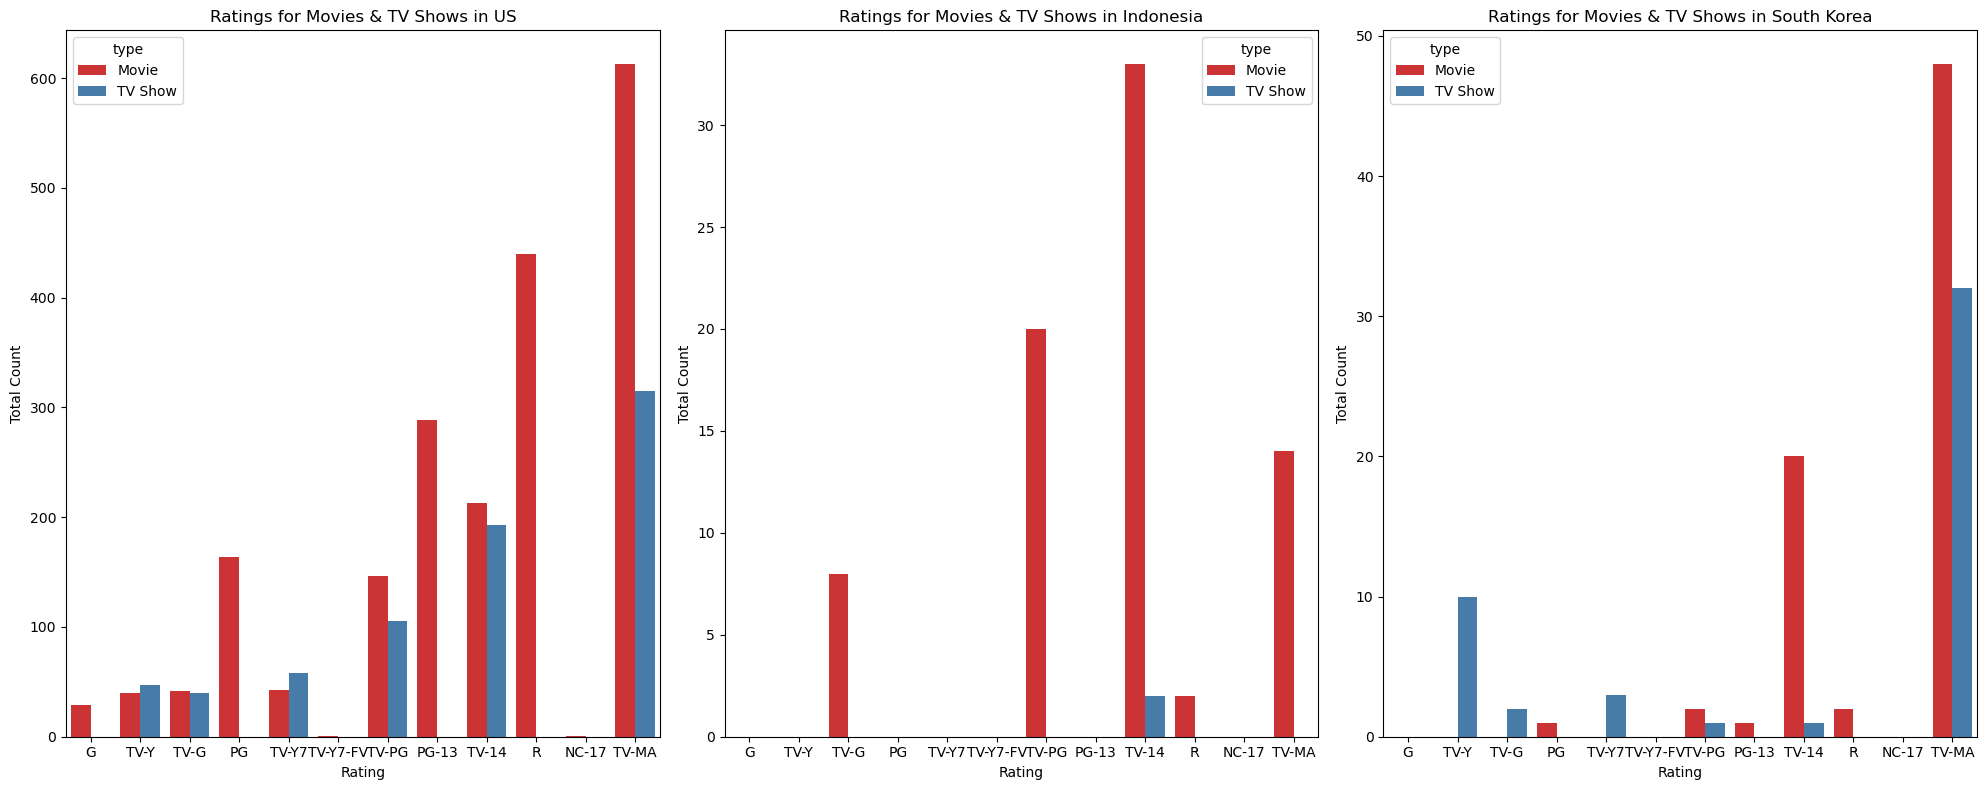

In [32]:
US = data[data.country == "United States"]
IND = data[data.country == "Indonesia"]
f=data[data.country=="France"]

order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

fig, axes = plt.subplots(1,3, figsize=(20, 8))


sns.countplot(data=US, x='rating', hue='type', order=order, palette="Set1", ax=axes[0])
axes[0].set_title("Ratings for Movies & TV Shows in US")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Total Count")


sns.countplot(data=IND, x='rating', hue='type', order=order, palette="Set1", ax=axes[1])
axes[1].set_title("Ratings for Movies & TV Shows in Indonesia")
axes[1].set_xlabel("Rating")
axes[1].set_ylabel("Total Count")

sns.countplot(data=f, x='rating', hue='type', order=order, palette="Set1", ax=axes[2])
axes[2].set_title("Ratings for Movies & TV Shows in South Korea")
axes[2].set_xlabel("Rating")
axes[2].set_ylabel("Total Count")

plt.tight_layout()
plt.show()


#  

# Top 5 Directors:
- by using value_counts() and by using head and passing 5 as argumeny it will print the top 5  directors which were the most frequent in dataset as top 5.

In [34]:
director_counts=data["director"].value_counts().head(5)
print(director_counts)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Name: count, dtype: int64


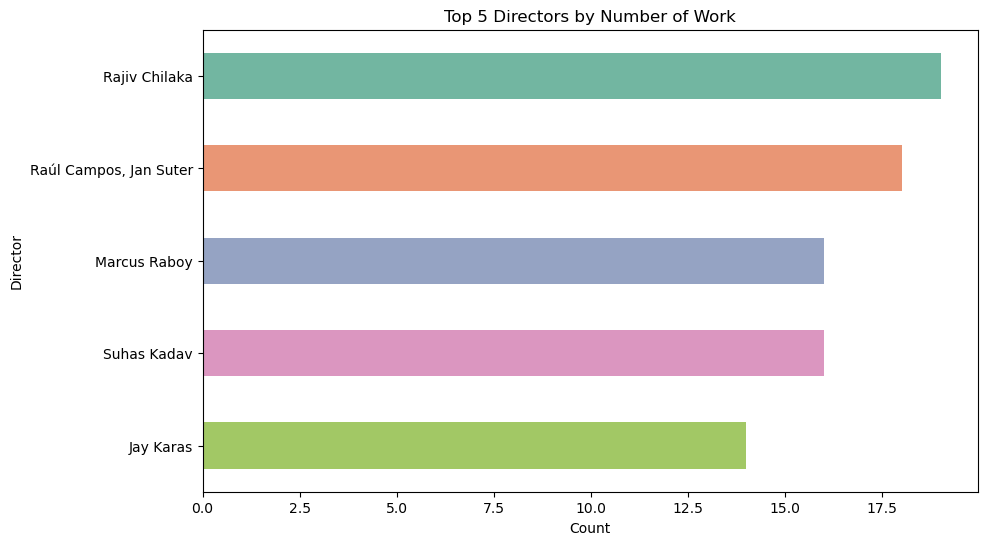

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x=director_counts, y=director_counts.index, palette='Set2',width=0.5) # .index tells the name of the director to be put on y axis
plt.xlabel('Count')
plt.ylabel('Director')
plt.title('Top 5 Directors by Number of Work')

plt.show()

# 

# Top Countries Producing  Content 

# US is the top country in production with 2818 count of content.

- through data. country we are accessing the value count of country and storing its count.
- through reset index we indentify by the name how many times each country has appreaed. 
- but we have printed only 5 countries that are top

In [36]:
countries = pd.DataFrame(data.country.value_counts().reset_index().values, columns=["country", "count"])
countries.head(5)


,country,count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199


#  Total Movies & Tv shows in US content

In [37]:
movies = data[(data['type'] == 'Movie') & (data['country'] == 'United States')]

print("Total Movies: ",len(movies))
print( " " )
tv=data[(data["type"]== "TV Show") & (data ["country"]== "United States")]

print( "Total TV shows: ", len(tv))

Total Movies:  2058
 
Total TV shows:  760


# Top Actors From whole dataset

# from the dataset the maximum count is for shahrkh khan, it means that Shahrukh khan is the top actor.

In [38]:
"""The Counter class in Python, which is part of the collections module, is a  way to count the occurrences of items
in an iterable (like a list) by storing them as
dictionary keys and their counts as dictionary values."""

from collections import Counter
actor_counts = Counter()

for cast_list in data['cast'].dropna():  #iterate throught the whole cast column
    for actor in cast_list.split(', '): # if there is a comma between name of the cast the it splits .
        actor_counts[actor] += 1         # incrementing its count by 1

top_actors = actor_counts.most_common(10)  #find the top 10 most common actos

top_actors_data = pd.DataFrame(top_actors, columns=['Actor', 'Count']) #tranfering this data set into a dataframe conttaining 
                                                              #two columns
top_actors_data.index = top_actors_data.index + 1  # adding 1 so it show sthe strating from 1 not from default 0 
print(top_actors_data)


               Actor  Count
1        Anupam Kher     43
2     Shah Rukh Khan     35
3      Julie Tejwani     33
4   Naseeruddin Shah     32
5   Takahiro Sakurai     32
6       Rupa Bhimani     31
7       Akshay Kumar     30
8            Om Puri     30
9          Yuki Kaji     29
10  Amitabh Bachchan     28


Text(0.5, 1.0, ' Top Actors By Number Of Works')

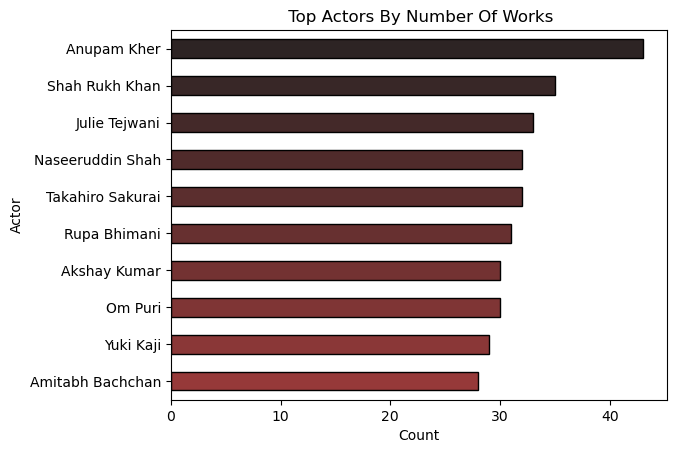

In [45]:

g = sns.barplot(y='Actor', x='Count', data=top_actors_data, palette="dark:brown", edgecolor="black", width=0.5)
plt.title(" Top Actors By Number Of Works")

# Top 10 geners with largest number of ratings:

# Oldest Netflix Movies

In [87]:
small = data.sort_values("release_year", ascending = True)
#small = small[small['duration'] != ""]
small[['title', "release_year"]][:15]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
7930,San Pietro,1945


# 

# Durations Of Movies
# 5 durations with the largest number of content titles on Netflix are 1 season, 2 seasons, 3 seasons, 102 minutes, and 97 minutes. The duration with the largest number of content titles is 1 season with 1000+ content titles on Netflix.

Text(0, 0.5, ' Count')

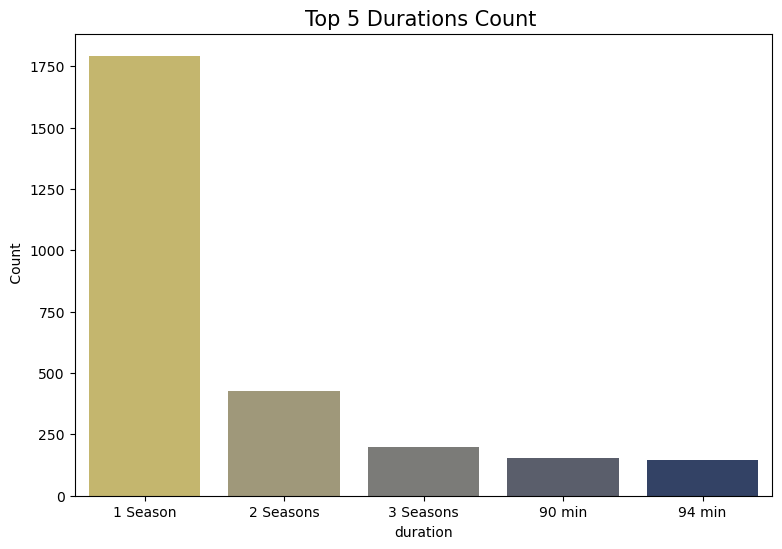

In [50]:

plt.figure(figsize=(9,6))
season = data['duration'].value_counts() #count the  values in the duration column
season= pd.DataFrame(season).reset_index() # making season a dataframe                                    #now instead of count we idenity its values through values like 1st season etc
season.columns = ['duration','title']  # passing two columns in dataframe
sns.barplot(x = 'duration',y = 'title', data=season.head(5), palette="cividis_r") # settting x and y labels
plt.title('Top 5 Durations Count ', fontsize=15);
plt.ylabel(" Count")

# 

# Top Genre In Movies

# The top genre in movies is  Dramas and international with the count of 350 + 

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
                                                   ... 
Sci-Fi & Fantasy                                      1
Sports Movies                                         1
Children & Family Movies, Comedies, Cult Movies       1
Cult Movies, Dramas, Music & Musicals                 1
Cult Movies, Dramas, Thrillers                        1
Name: count, Length: 278, dtype: int64


Text(0.5, 0, 'Count')

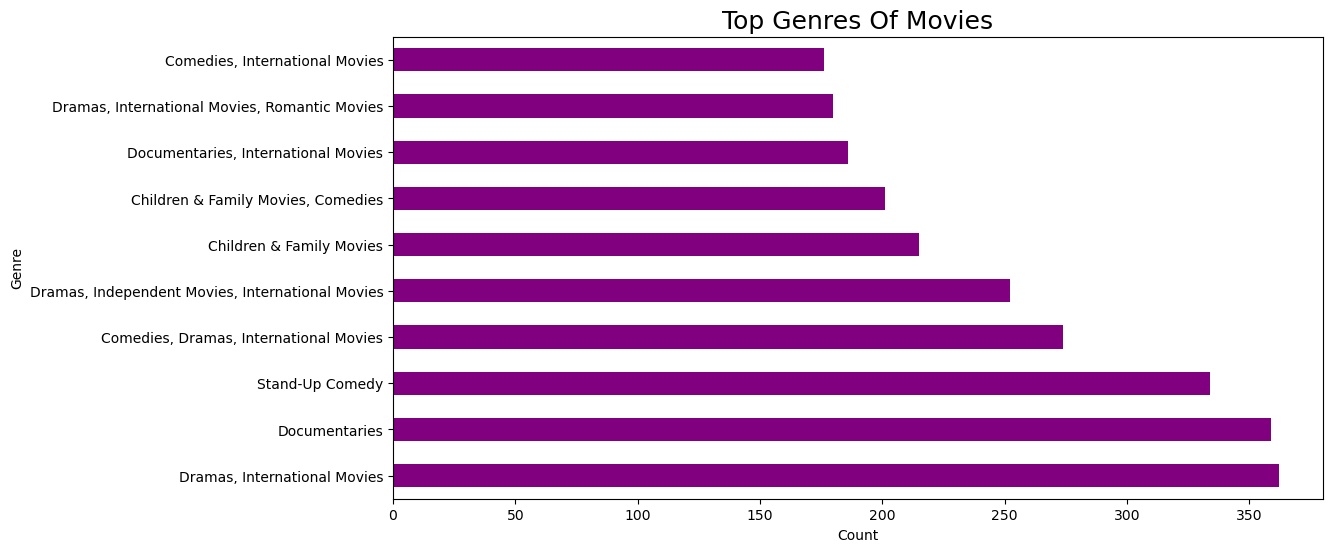

In [52]:
plt.figure(figsize=(12,6))
genre=data[data["type"]=="Movie"]["listed_in"].value_counts()
print(genre)
data[data["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="purple")
plt.title("Top Genres Of Movies",size=18)
plt.ylabel("Genre")
plt.xlabel("Count")

# Top Genre in TV shows

# Th top genre in TV shows is the kids section or kids show with count more than 250+

listed_in
Kids' TV                                                 220
International TV Shows, TV Dramas                        121
Crime TV Shows, International TV Shows, TV Dramas        110
Kids' TV, TV Comedies                                     99
Reality TV                                                95
                                                        ... 
Kids' TV, TV Action & Adventure, TV Dramas                 1
British TV Shows, Kids' TV, TV Thrillers                   1
Reality TV, TV Horror, TV Thrillers                        1
TV Action & Adventure, TV Horror, TV Sci-Fi & Fantasy      1
Classic & Cult TV, Crime TV Shows, TV Dramas               1
Name: count, Length: 236, dtype: int64


Text(0.5, 0, 'Count')

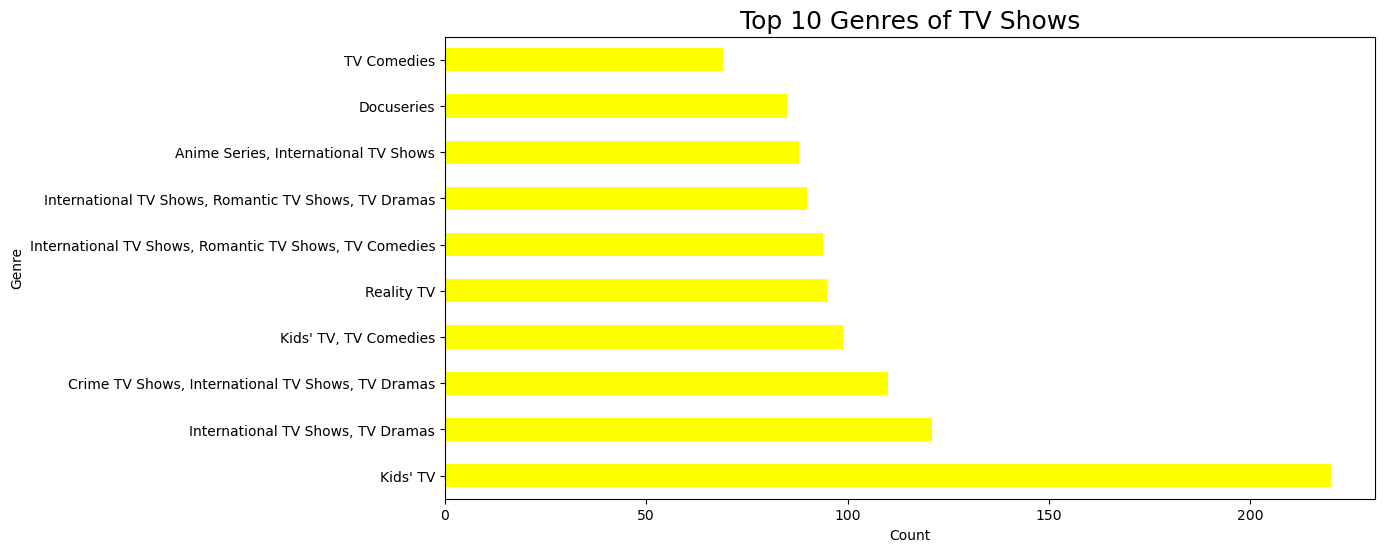

In [53]:
plt.figure(figsize=(12,6))
genre=data[data["type"]=="TV Show"]["listed_in"].value_counts()
print(genre)
data[data["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="yellow")
plt.title("Top 10 Genres of TV Shows",size=18)
plt.ylabel("Genre")
plt.xlabel("Count")

# Stock Analysis Of Netflix

# 

In [56]:
!pip install yfinance


In [57]:

import yfinance as yf
ticker = 'NFLX' # through this it will gather up data from yahoo finanace fro nretfliux abd stored in the ticker.
netflix = yf.Ticker(ticker)


# Major ShareHolders

In [58]:
netflix.major_holders

Breakdown,Value
insidersPercentHeld,0.00736
institutionsPercentHeld,0.85128
institutionsFloatPercentHeld,0.85760
institutionsCount,3210.00000


# 

In [59]:
netflix.institutional_holders

,Date Reported,Holder,pctHeld,Shares,Value
0,2023-06-30,Vanguard Group Inc,0.0816,36179028,15936500043
1,2023-06-30,Blackrock Inc.,0.0675,29911686,13175798566
2,2023-06-30,"FMR, LLC",0.0531,23551711,10374293178
3,2023-06-30,Capital Research Global Investors,0.0394,17479045,7699344532
4,2023-06-30,State Street Corporation,0.0377,16699906,7356141593
5,2023-06-30,Price (T.Rowe) Associates Inc,0.0279,12378010,5452389624
6,2023-06-30,Capital World Investors,0.0258,11431257,5035354395
7,2023-06-30,Capital International Investors,0.0252,11167223,4919050059
8,2023-06-30,JP Morgan Chase & Company,0.0216,9594129,4226117883
9,2023-06-30,"Geode Capital Management, LLC",0.0189,8390820,3696072301


# Recomendations On Buying Stock

In [60]:
r=netflix.recommendations  # this shows the number of analysis that have rated as strong buy, hold,sell etc
r                         # 0 in period means current month, -1 means one month ago...strong sell: who strongly recommend selling the stock

,period,strongBuy,buy,hold,sell,strongSell
0,0m,11,14,14,1,1
1,-1m,11,18,15,1,0
2,-2m,11,18,15,1,0
3,-3m,11,13,17,3,1


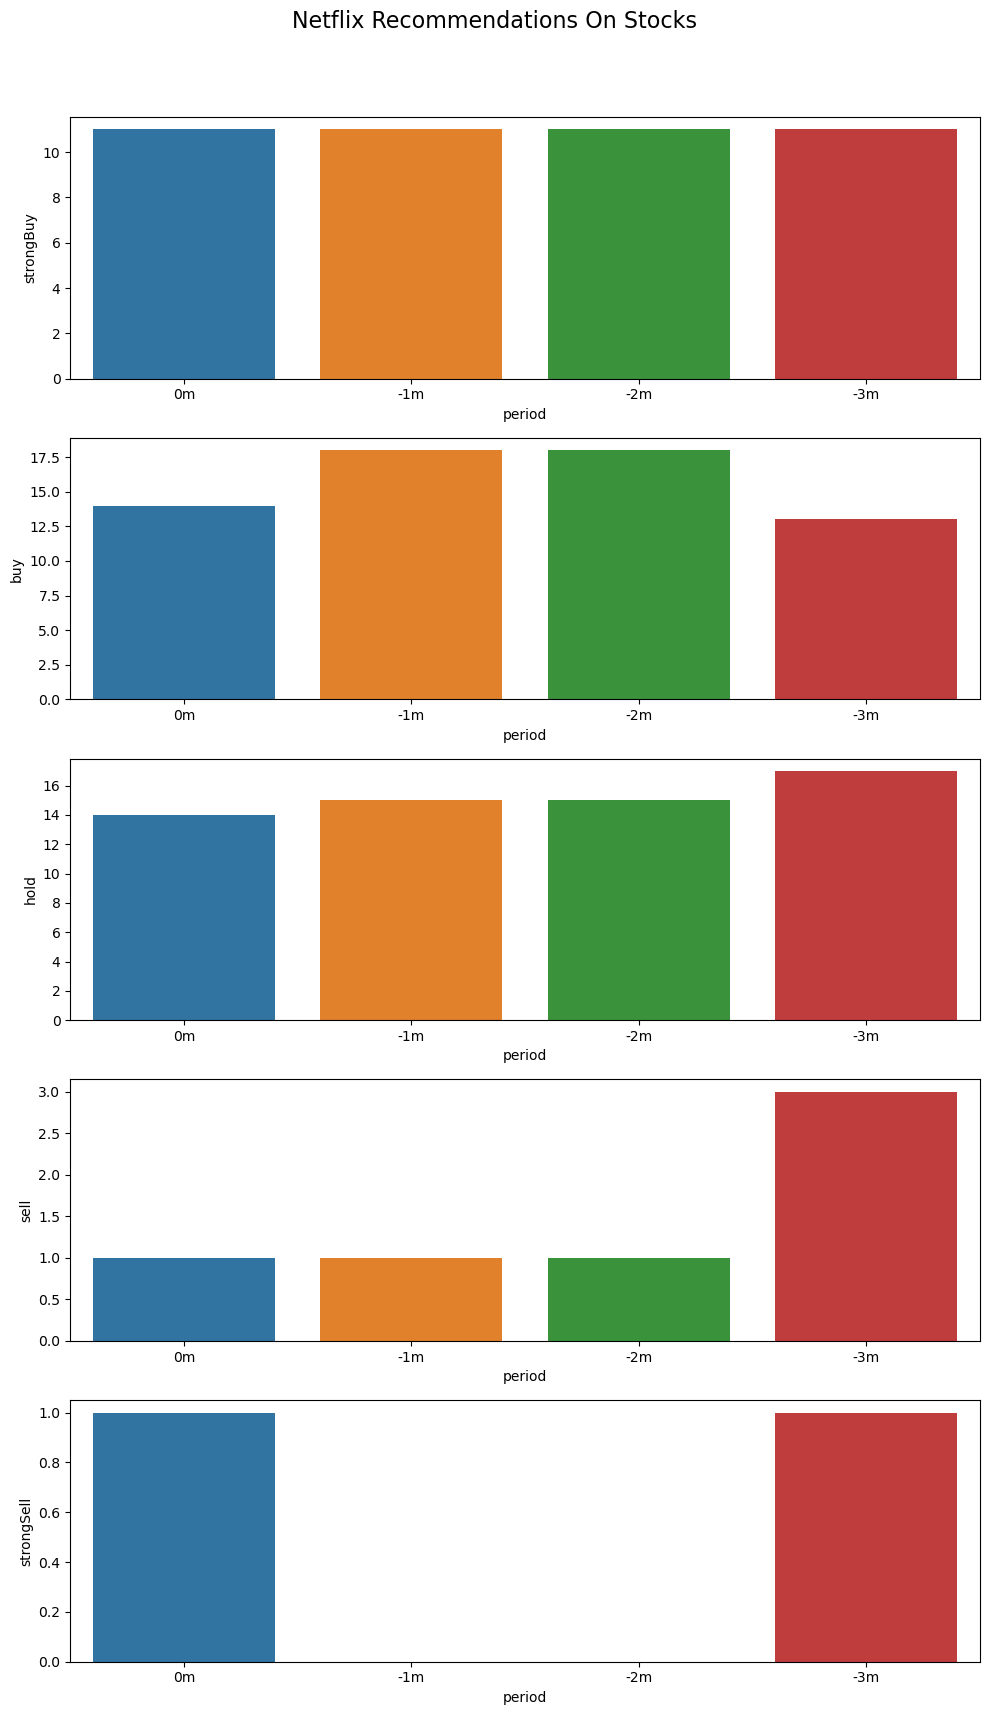

In [71]:
fig, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(5, figsize=(10,18))
fig.suptitle("Netflix Recommendations On Stocks", fontsize=16)

sns.barplot(data=r,x=r["period"], y=r["strongBuy"],ax=ax1)

sns.barplot(data=r,x=r["period"], y=r["buy"],ax=ax2)

sns.barplot(data=r,x=r["period"], y=r["hold"],ax=ax3)

sns.barplot(data=r,x=r["period"], y=r["sell"],ax=ax4)

sns.barplot(data=r,x=r["period"], y=r["strongSell"],ax=ax5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

# Overall Trend In Stock

In [39]:
netflix.calendar

{'Earnings Date': [datetime.date(2024, 7, 18), datetime.date(2024, 7, 23)],
 'Earnings High': 5.05,
 'Earnings Low': 4.51,
 'Earnings Average': 4.74,
 'Revenue High': 9708000000,
 'Revenue Low': 9440000000,
 'Revenue Average': 9527860000}

# Loading The Stock Data Set

In [73]:
df=pd.read_csv("NFLX.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
4576,2020-07-28,496.019989,497.790009,487.760010,488.510010,488.510010,5986700
4577,2020-07-29,492.250000,494.920013,484.130005,484.480011,484.480011,6611800
4578,2020-07-30,480.709991,488.350006,477.510010,485.799988,485.799988,6608600
4579,2020-07-31,488.290009,494.799988,484.500000,488.880005,488.880005,5924300


In [74]:
sns.set(rc={'figure.figsize':(10,6)})  # we want to set date column as index instead of default index colum

# Setting date as 1st column

In [75]:
df["Date"]=pd.to_datetime(df["Date"])
df=df.set_index("Date")  # changed dat ecolumn to index
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


# Volume Vs Stock over time

# The year 2012 and 2005 has the maximum volume , their bars being the highest

Text(0.5, 0, 'Years')

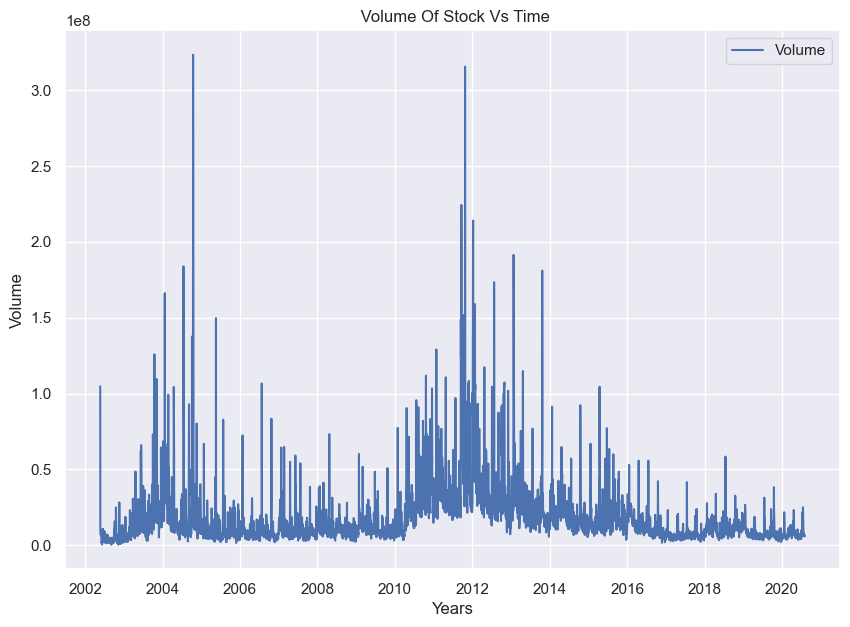

In [78]:
plt.figure(figsize=(10,7))
sns.lineplot(x=df.index, y=df["Volume"], label="Volume")
plt.title(" Volume Of Stock Vs Time")
plt.xlabel("Years")

# High Open Close Over Years

- The values for three columns are so close to each that they are ovrelapping

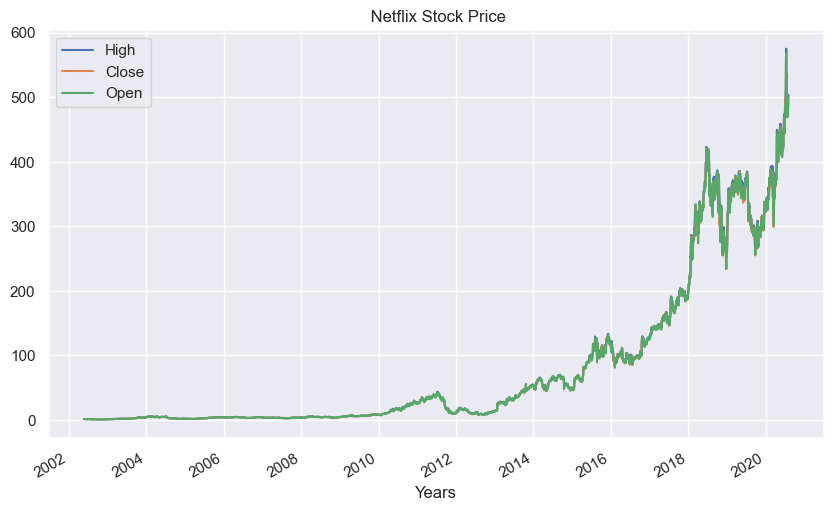

In [77]:

df.plot( y=["High", "Close", "Open"],title=" High vs Open Vs Close")
plt.xlabel ("Years")
plt.show()


# Stock For day, month and year wise

<Axes: xlabel='Year'>

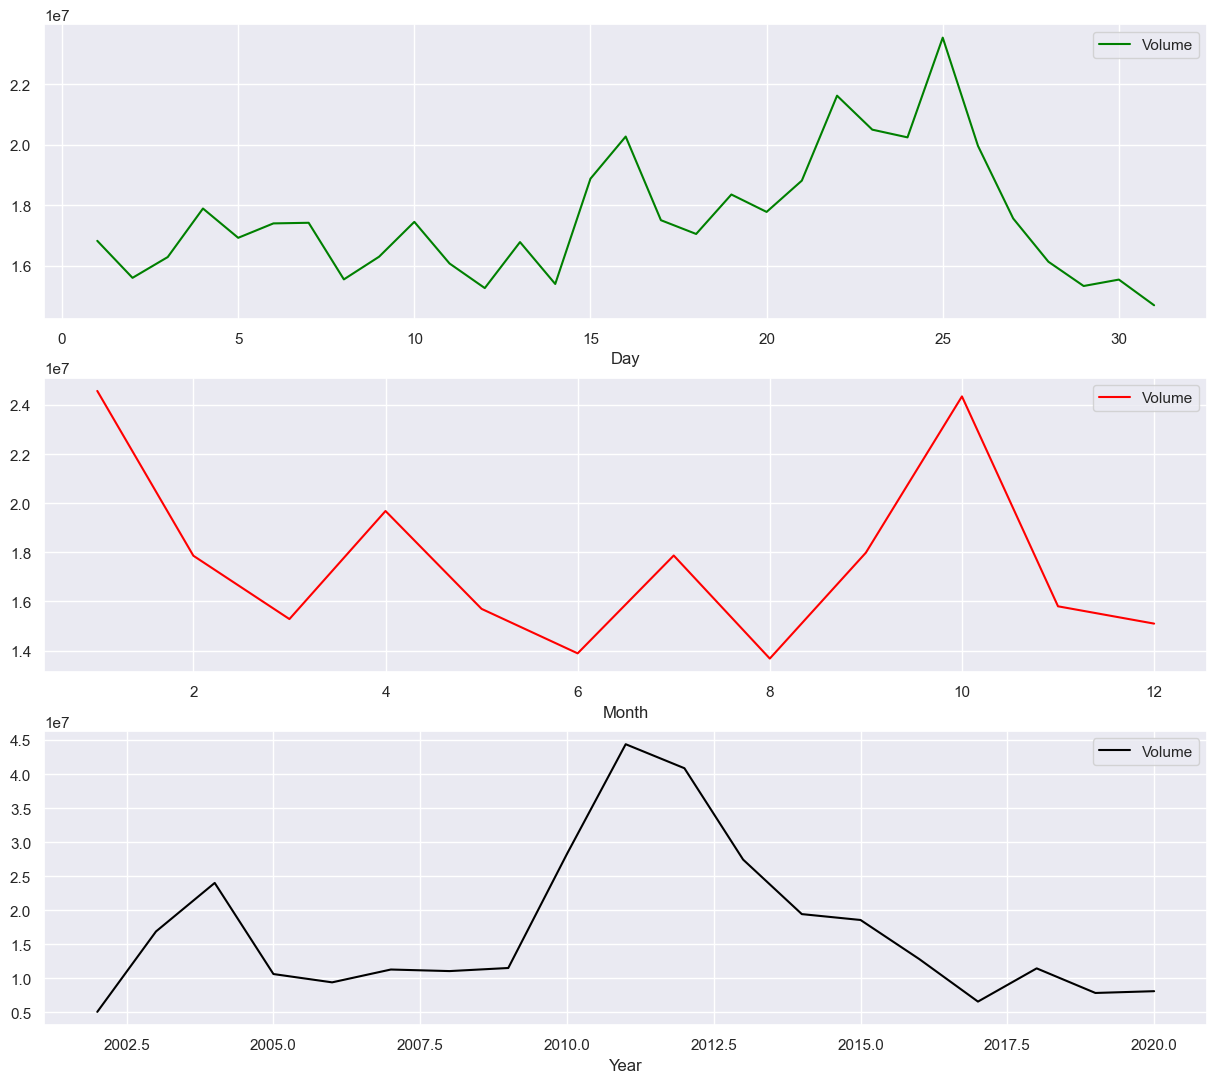

In [45]:
fig, (ax1,ax2,ax3)=plt.subplots(3, figsize=(15,13))
df.groupby(df.index.day).mean().plot(y="Volume",ax=ax1,xlabel="Day",color="green")
df.groupby(df.index.month).mean().plot(y="Volume",ax=ax2,xlabel="Month",color="red")
df.groupby(df.index.year).mean().plot(y="Volume",ax=ax3,xlabel="Year",color="black")

# top 5 dates with the highest stock prices 

In [90]:
high_values=df.sort_values(by="High",ascending=False).head(5)
high_values["High"]

Date
2020-07-13    575.369995
2020-07-10    555.880005
2020-07-16    535.539978
2020-07-15    529.000000
2020-07-14    525.500000
Name: High, dtype: float64

# Top 5 lowest Stocks

In [91]:

low_values=df.sort_values(by="Low",ascending=True).head(5) # ascending beacsue we want smaller values
low_values["Low"]

Date
2002-10-10    0.346429
2002-10-09    0.347143
2002-10-07    0.382143
2002-10-08    0.390714
2002-10-16    0.442857
Name: Low, dtype: float64